In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pl
%matplotlib inline

### Function & Learning Rate

In [ ]:
def act_function(x):
  return 1/(1+np.exp(-x))
def grad_act(x):
  return x*(1-x)
#l1_rate is learning rate for bias
l1_rates = [0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1]
#l_rate is learning rate for weights
l_rates = [0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1]
n = 10000

## Training Nural Network For XNOR

xnor_w1:  [ 4.78746622 -1.40525313] [6.79617993 5.5365723 ]
xnor_w2:  [-5.72369465] [4.30722899]
xnor_b1:  [-1.0063867   0.86960921]
xnor_b2:  [1.40975832]
Predictions:  


 [[0.49115846]
 [0.06939659]
 [0.50091116]
 [0.94846718]]


Text(0.5, 1.0, 'Loss Value VS Epochs')

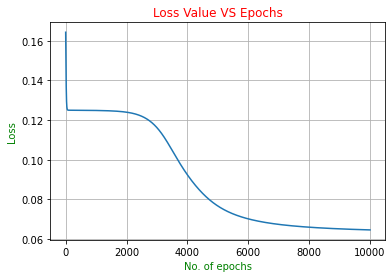

In [ ]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[1]])
epoc_frequency = 10000
loss_collect = []
l_rate , l1_rate = 0.1 , 0.1
N,D,H,Y = 1,2,2,1
xnor_w1 = np.random.uniform(size = (D,H))
xnor_b1 = np.random.uniform(size = (1,H))
xnor_w2 = np.random.uniform(size = (H,Y))
xnor_b2 = np.random.uniform(size = (1,Y))
for i in range(n):

  l1 = x.dot(xnor_w1)
  l1 += xnor_b1
  h1 = act_function(l1)

  l2 = h1.dot(xnor_w2)
  l2 += xnor_b2
  pred_y = act_function(l2)

  loss = 0.5*(np.square(y-pred_y))
  loss_value = np.mean(loss)

  grad_loss = y-pred_y
  grad_l2 = grad_loss*grad_act(pred_y)
  grad_xnor_w2 = h1.T.dot(grad_l2)
  grad_h1 = grad_l2.dot(xnor_w2.T)
  grad_l1 = grad_h1*grad_act(h1)
  grad_xnor_w1 = x.T.dot(grad_l1)

  xnor_w1 += l_rate * grad_xnor_w1
  xnor_b1 += np.sum(grad_l1,axis = 0,keepdims = True) * l1_rate
  xnor_w2 += l_rate * grad_xnor_w2
  xnor_b2 += np.sum(grad_l2,axis = 0,keepdims = True) * l1_rate

  #if i%1000 == 0:
  loss_collect.append(loss_value)

print('xnor_w1: ' , *xnor_w1)
print('xnor_w2: ' , *xnor_w2)
print('xnor_b1: ' , *xnor_b1)
print('xnor_b2: ' , *xnor_b2)  
print('Predictions: ','\n\n\n' , pred_y)
#plt.figure(figsize = (12.8,9.6))
plt.plot(range(n) , loss_collect)
plt.grid(True)
plt.xlabel('No. of epochs' , color = 'g')
plt.ylabel('Loss', color = 'g')
plt.title('Loss Value VS Epochs',color = 'r' )


## Training Nural Network for XOR

xor_w1:  [6.73900307 4.8230855 ] [6.72013936 4.81851023]
xor_w2:  [10.32174097] [-11.03857363]
xor_b1:  [-3.0258626 -7.3958569]
xor_b2:  [-4.80170905]
Predictions:  


 [[0.01140534]
 [0.98891872]
 [0.98890504]
 [0.0129858 ]]


Text(0.5, 1.0, 'Loss Value VS Epochs')

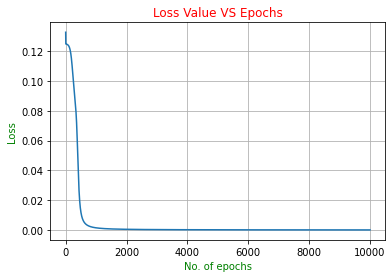

In [ ]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
epoc_frequency = 10000
loss_collect = []
#After obserbing above graph I fixed the biases to 1
l_rate , l1_rate = 1 , 1
N,D,H,Y = 1,2,2,1
xor_w1 = np.random.uniform(size = (D,H))
xor_b1 = np.random.uniform(size = (1,H))
xor_w2 = np.random.uniform(size = (H,Y))
xor_b2 = np.random.uniform(size = (1,Y))
for i in range(n):

  l1 = x.dot(xor_w1)
  l1 += xor_b1
  h1 = act_function(l1)

  l2 = h1.dot(xor_w2)
  l2 += xor_b2
  pred_y = act_function(l2)

  loss = 0.5*(np.square(y-pred_y))
  loss_value = np.mean(loss)

  grad_loss = y-pred_y
  grad_l2 = grad_loss*grad_act(pred_y)
  grad_xor_w2 = h1.T.dot(grad_l2)
  grad_h1 = grad_l2.dot(xor_w2.T)
  grad_l1 = grad_h1*grad_act(h1)
  grad_xor_w1 = x.T.dot(grad_l1)

  xor_w1 += l_rate * grad_xor_w1
  xor_b1 += np.sum(grad_l1,axis = 0,keepdims = True) * l1_rate
  xor_w2 += l_rate * grad_xor_w2
  xor_b2 += np.sum(grad_l2,axis = 0,keepdims = True) * l1_rate

  loss_collect.append(loss_value)

print('xor_w1: ' , *xor_w1)
print('xor_w2: ' , *xor_w2)
print('xor_b1: ' , *xor_b1)
print('xor_b2: ' , *xor_b2)  
print('Predictions: ','\n\n\n' , pred_y)
#plt.figure(figsize = (12.8,9.6))
plt.plot(range(n) , loss_collect)
plt.grid(True)
plt.xlabel('No. of epochs' , color = 'g')
plt.ylabel('Loss', color = 'g')
plt.title('Loss Value VS Epochs',color = 'r' )


## Prediction of Output

In [ ]:
def value(x,w1,w2,b1,b2):
  l1 = x.dot(w1)
  l1 += b1
  h1 = act_function(l1)

  l2 = h1.dot(w2)
  l2 += b2
  pred_y = act_function(l2)
  return pred_y

def predict(x,k):
  if k==0:
    return value(x,xor_w1,xor_w2,xor_b1,xor_b2)
  else:
    return value(x,xnor_w1,xnor_w2,xnor_b1,xnor_b2)

### **User Input** 

In [ ]:
# Format for input: [[ <x1(first bit)> , <x2(2nd bit)> ]]
# Format for task: < x3(task) >
# task:
#   1: XNOR
#   0: XOR
input_bits = np.array([[1,1]])
task = 0
print(*predict(input_bits , task)) 

[0.0114047]
